In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style = 'darkgrid' , color_codes=True)
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Univariate Analysis

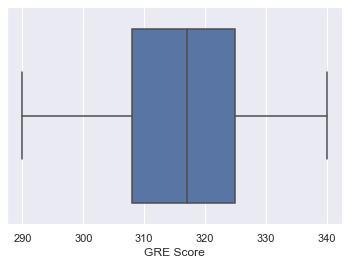

In [4]:
sns.boxplot(df['GRE Score'])

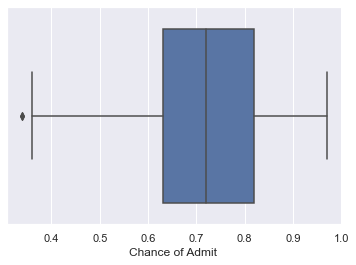

In [5]:
sns.boxplot(df['Chance of Admit '])

Text(0.5, 1.0, 'Distribution of TOEFL Score')

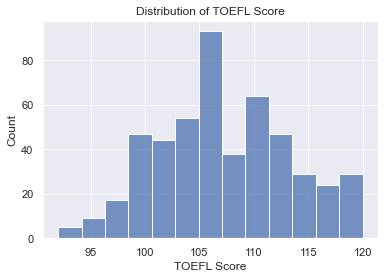

In [6]:
sns.histplot(df['TOEFL Score'])
plt.title('Distribution of TOEFL Score')

Text(0.5, 1.0, 'Distribution of University Rating')

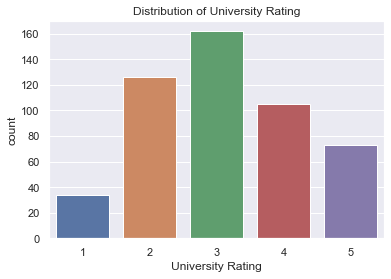

In [7]:
sns.countplot(x='University Rating',data=df)
plt.title('Distribution of University Rating')

Text(0.5, 1.0, 'Distribution of SOP Rating')

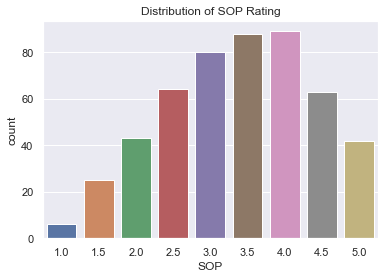

In [8]:
sns.countplot(x='SOP',data=df)
plt.title('Distribution of SOP Rating')

Text(0.5, 1.0, 'Distribution of LOR rating')

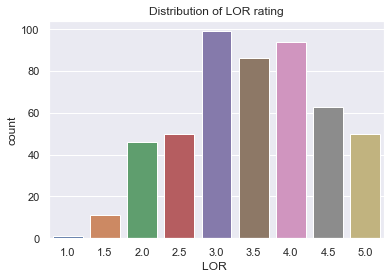

In [9]:
sns.countplot(x='LOR ',data=df)
plt.title('Distribution of LOR rating')

Text(0.5, 1.0, 'Distribution of CGPA')

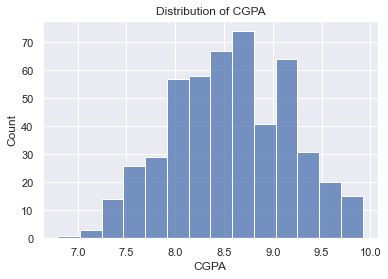

In [10]:
sns.histplot(df['CGPA'])
plt.title('Distribution of CGPA')

Text(0.5, 1.0, 'Distribution of Research')

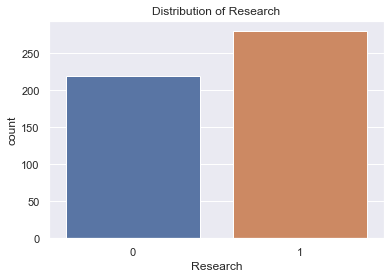

In [11]:
sns.countplot(x='Research',data=df)
plt.title('Distribution of Research')

In [12]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

Text(0.5, 1.0, 'Distribution of Chance of Admit')

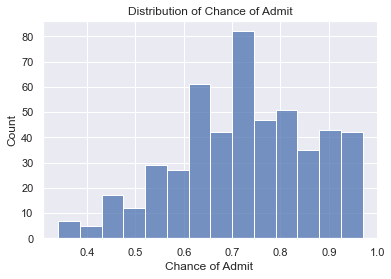

In [13]:
sns.histplot(df['Chance of Admit '])
plt.title('Distribution of Chance of Admit')

## Bivariate Analysis

Text(0.5, 1.0, 'Relation between GRE Score and chance of Admit')

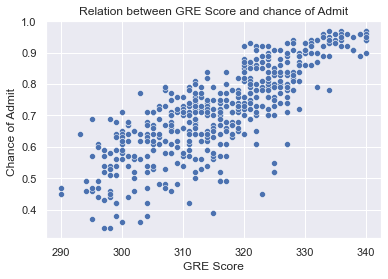

In [14]:
sns.scatterplot(x='GRE Score',y='Chance of Admit ',data=df)
plt.title('Relation between GRE Score and chance of Admit')

Text(0.5, 1.0, 'Relation between TOEFL score and chance of Admit')

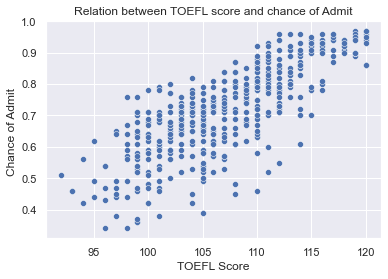

In [15]:
sns.scatterplot(x='TOEFL Score',y='Chance of Admit ',data=df)
plt.title('Relation between TOEFL score and chance of Admit')

Text(0.5, 1.0, 'Relation between Univeristy Rating and chance of Admit')

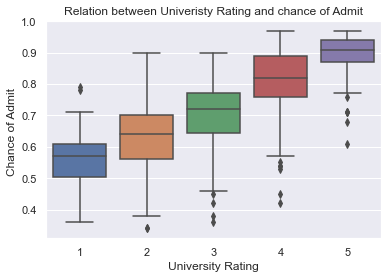

In [16]:
sns.boxplot(x='University Rating',y='Chance of Admit ',data=df)
plt.title('Relation between Univeristy Rating and chance of Admit')

Text(0.5, 1.0, 'Relation between SOP and chance of Admit')

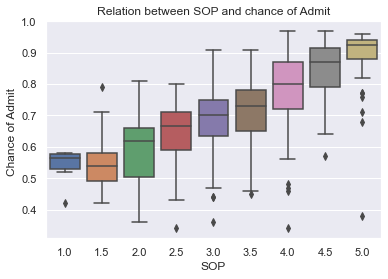

In [17]:
sns.boxplot(x='SOP',y='Chance of Admit ',data=df)
plt.title('Relation between SOP and chance of Admit')

Text(0.5, 1.0, 'Relation between LOR and chance of Admit')

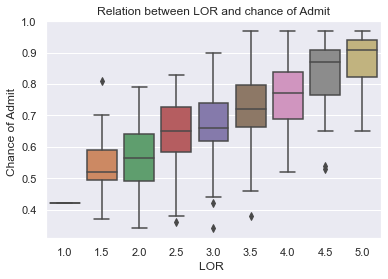

In [18]:
sns.boxplot(x='LOR ',y='Chance of Admit ',data=df)
plt.title('Relation between LOR and chance of Admit')

Text(0.5, 1.0, 'Relation between CGPA and chance of Admit')

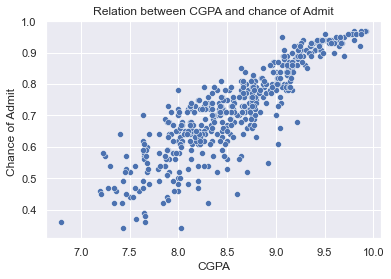

In [19]:
sns.scatterplot(x='CGPA',y='Chance of Admit ',data=df)
plt.title('Relation between CGPA and chance of Admit')

Text(0.5, 1.0, 'Relation between Research and chance of Admit')

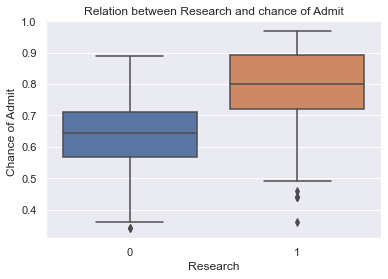

In [20]:
sns.boxplot(x='Research',y='Chance of Admit ',data=df)
plt.title('Relation between Research and chance of Admit')

In [21]:
df.drop(columns=['Serial No.'],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


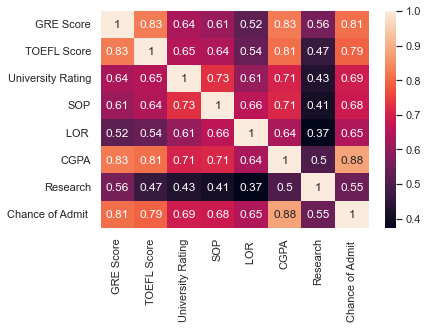

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
df.shape

(500, 8)

In [24]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

#### Through Trail and error, decided these are the columns that help me in uilding a better model, as there is no much difference in the model with all variables and model with the below mentioned variables

In [25]:
col=['GRE Score',
'TOEFL Score',
'LOR ',
'CGPA',
'SOP',
'Research'
]

### Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler
df1=df
for i in col:
    df1[i] = StandardScaler().fit_transform(df1[[i]])

In [27]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,4,1.137360,1.098944,1.776806,0.886405,0.92
1,0.667148,-0.031601,4,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.041830,-0.525364,3,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.489904,0.462163,3,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.219074,-0.689952,2,-1.387862,-0.523513,-0.606480,-1.128152,0.65


In [28]:
X=df1[col]
Y=df1['Chance of Admit ']

In [29]:
print(X.shape, Y.shape)

(500, 6) (500,)


### Performing Linear Regression with Statsmodel

In [30]:
import statsmodels.api as sm

In [31]:
X_sm = sm.add_constant(X)

sm_model = sm.OLS(Y, X_sm).fit()

#### Summary of Stats Model

In [32]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     376.9
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          1.37e-180
Time:                        08:28:02   Log-Likelihood:                 700.15
No. Observations:                 500   AIC:                            -1386.
Df Residuals:                     493   BIC:                            -1357.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7217      0.003    268.647      

### Checking VIF Score

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,CGPA,4.68
0,GRE Score,4.45
1,TOEFL Score,3.87
4,SOP,2.45
2,LOR,1.99
5,Research,1.49


#### Linear Regression Using Scikit Learn

In [35]:
from sklearn.linear_model import LinearRegression
rm=LinearRegression()
rm.fit(X,Y)

LinearRegression()

In [36]:
print(rm.intercept_)

0.7217399999999997


In [37]:
[print(f"The coefficient of {col[i]} is {rm.coef_[i]}") for i in range(len(col))]

The coefficient of GRE Score is 0.021404695703631405
The coefficient of TOEFL Score is 0.01760495005366209
The coefficient of LOR  is 0.016432612597028093
The coefficient of CGPA is 0.07283664907806046
The coefficient of SOP is 0.004168721982917806
The coefficient of Research is 0.012349581379967556


[None, None, None, None, None, None]

In [38]:
rm.score(X,Y)

0.8210166861582956

#### Mean of Resiuals

In [39]:
Y_pred = rm.predict(X)
residuals = Y.values-Y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(round(mean_residuals,5)))

Mean of Residuals 0.0


#### Test of Homoscedasticity

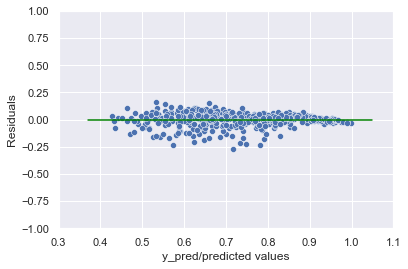

In [40]:
sns.scatterplot(Y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0.3,1.10)
p = sns.lineplot([0.37,1.05],[0,0],color='green')

#### Goldfeld Quandt Test to check Homoscedasticity

In [41]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F_stat','P_value']
GQT = sms.het_goldfeldquandt(residuals, X)
lzip(name,GQT)

[('F_stat', 0.45996749764483563), ('P_value', 0.9999999989223426)]

#### Normality of Residuals

Residuals are not Normally Distributed as p value is  3.6739042749043505e-25 which is less than 0.05


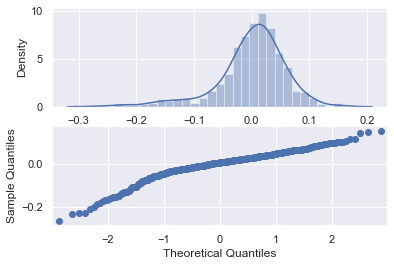

In [42]:
fig,axes=plt.subplots(2)
sns.distplot(residuals,ax=axes[0])
sm.qqplot(residuals,ax=axes[1])
p=stats.normaltest(residuals).pvalue
if p>0.05:
    print('Residuals are Normally Distributed as p value is  '+str(p)+' which is greater than 0.05')
else:
    print('Residuals are not Normally Distributed as p value is  '+str(p)+' which is less than 0.05')

#### Performance checks on Model

In [43]:
print("mean absolute error : ",mean_absolute_error(Y_pred,Y))
print("Mean Squared error : ", mean_squared_error(Y_pred,Y))
print("Root Mean squared error : ", np.sqrt(mean_squared_error(Y_pred,Y)))
print("Mean absolute Percentage error : ",mean_absolute_percentage_error(Y_pred,Y))
print("R-squared : ",rm.score(X,Y))
print("Adjusted R-squared : ", 1 - (1-rm.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

mean absolute error :  0.04276860707461887
Mean Squared error :  0.003558326525884695
Root Mean squared error :  0.059651710167309496
Mean absolute Percentage error :  0.0641908511172667
R-squared :  0.8210166861582956
Adjusted R-squared :  0.8188383902494716


#### Linear Regression with Train and Test data 

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=1 )

In [54]:
for i in x_train.columns:
    x_train[i] = StandardScaler().fit_transform(x_train[[i]])
for i in x_test.columns:
    x_test[i] = StandardScaler().fit_transform(x_test[[i]])
#y_train = StandardScaler().fit_transform(y_train)
#y_test = StandardScaler().fit_transform(y_test)

In [55]:
fm=LinearRegression()
fm.fit(x_train,y_train)

LinearRegression()

In [46]:
### print(fm.intercept_,fm.coef_)

0.7226452460475254 [0.02142235 0.01981272 0.01430457 0.07165618 0.00570992 0.01020389]


In [56]:
print(fm.intercept_,fm.coef_)

0.720925 [0.02166616 0.02019678 0.01450858 0.0718384  0.00585253 0.01022135]


In [57]:
y_pred = fm.predict(x_test)

In [48]:
#print("mean absolute error : ",mean_absolute_error(y_pred,y_test))
#print("Mean Squared error : ", mean_squared_error(y_pred,y_test))
#print("Root Mean squared error : ", np.sqrt(mean_squared_error(y_pred,y_test)))
#print("Mean absolute Percentage error : ",mean_absolute_percentage_error(y_pred,y_test))
#print("R-squared : ",rm.score(x_train,y_train))
#print("Adjusted R-squared : ", 1 - (1-rm.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

mean absolute error :  0.04006870393111951
Mean Squared error :  0.0034716563533543753
Root Mean squared error :  0.058920763346670714
Mean absolute Percentage error :  0.05874548625702469
R-squared :  0.8202210391178049
Adjusted R-squared :  0.8174763221577713


In [58]:
print("mean absolute error : ",mean_absolute_error(y_pred,y_test))
print("Mean Squared error : ", mean_squared_error(y_pred,y_test))
print("Root Mean squared error : ", np.sqrt(mean_squared_error(y_pred,y_test)))
print("Mean absolute Percentage error : ",mean_absolute_percentage_error(y_pred,y_test))
print("R-squared : ",rm.score(x_train,y_train))
print("Adjusted R-squared : ", 1 - (1-rm.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

mean absolute error :  0.04159546142442519
Mean Squared error :  0.0034630767977100584
Root Mean squared error :  0.05884791243289823
Mean absolute Percentage error :  0.06172778291335172
R-squared :  0.82023913907109
Adjusted R-squared :  0.8174946984462211


In [60]:
#[print(f"The coefficient of {col[i]} is {fm.coef_[i]}") for i in range(len(col))]

In [61]:
[print(f"The coefficient of {col[i]} is {fm.coef_[i]}") for i in range(len(col))]

The coefficient of GRE Score is 0.0216661602895151
The coefficient of TOEFL Score is 0.020196784714057142
The coefficient of LOR  is 0.014508579362752839
The coefficient of CGPA is 0.07183839813043286
The coefficient of SOP is 0.00585252534758233
The coefficient of Research is 0.010221347640475557


[None, None, None, None, None, None]

#### For all the models which e built using different techniques, there is a good value of R-squared and adjusted R- Square value. So we can consider our model as good and the Root Mean Squared Errors for Scikit Learn Models (one is with direct data and other with train,test data) are also pretty low